# Import Standard Libraries #

In [243]:
import pandas as pd 
import numpy as np
import random
from datetime import datetime
from IPython.core.display import Image, HTML

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline 
matplotlib.style.use('ggplot')

# Load Data (CSV, API, HTML, Mongo-DB, etc) #

# 1. Pull the training set from the newsgroup data
The data has 20 different categories. Try to shrink down to smaller number of groups according to the definition here:
http://scikit-learn.org/stable/datasets/twenty_newsgroups.html

In [244]:
from sklearn import datasets

df = datasets.fetch_20newsgroups(remove =['headers','footers','quotes'],categories=['talk.religion.misc',
                                                                                    'rec.sport.baseball',
                                                                                    'comp.sys.mac.hardware',
                                                                                    'sci.space'])

# Assign X,y Variables #

In [245]:
X = df.data # Text data (emails, etc)
y = df.target #Newsgroup

# Split into Training/Test Data #

In [246]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Feature Engineering - Create Vectorizer #

In [247]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer(max_df=.5, max_features=1000,
                                 min_df=2, stop_words='english',
                                 use_idf=True, sublinear_tf=False, 
                                 analyzer = 'word',
                                 token_pattern = '[a-zA-Z]{4,50}',
                            )

X_train_ = vectorizer_tfidf.fit_transform(X_train)

# Visualize the vectorizer (Rows are newsgroups, columns are earch word)
df_vectorizer_data = vectorizer_tfidf.transform(X_train).todense()
df_vectorizer = pd.DataFrame(df_vectorizer_data, columns = list(vectorizer_tfidf.vocabulary_))

print df_vectorizer.sum()
df_vectorizer.head()

hanging        3.358159
increase       9.487374
example        3.652832
want           4.431110
wrong          3.166526
telescope      3.531354
series         1.927517
allah          2.207434
message        1.919111
yesterday      3.084960
speeds        14.731754
purpose        3.041413
service        1.701341
needed         1.914565
came           2.400931
saying         8.760202
lots           8.751338
nature         3.432227
country        2.768202
stadium        2.759603
dave           6.823193
worked         3.800769
european       2.673938
voyager        4.608523
defensive      1.252305
facility       3.992149
support        3.832780
inside         2.139920
holy           1.274231
models         7.353179
                ...    
christ         3.321721
steve          2.062684
issues         0.822276
reds           3.778826
apple          2.440700
apply          4.934245
sort           6.468439
serial         7.250273
united         4.362256
looks         18.108161
choose         3

,hanging,increase,example,want,wrong,telescope,series,allah,message,yesterday,...,hitter,view,rocket,boot,lead,getting,funds,record,book,june
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Reduce Features - Truncated SVD + Normalizer #

In [248]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

svd = TruncatedSVD(300)
normalizer = Normalizer(copy=False)
pipeline_lsa = make_pipeline(svd, normalizer)

X_train_ = pipeline_lsa.fit_transform(X_train_)

print "Explained variance with LSA"
print svd.explained_variance_ratio_.sum()


Explained variance with LSA
0.71525710642


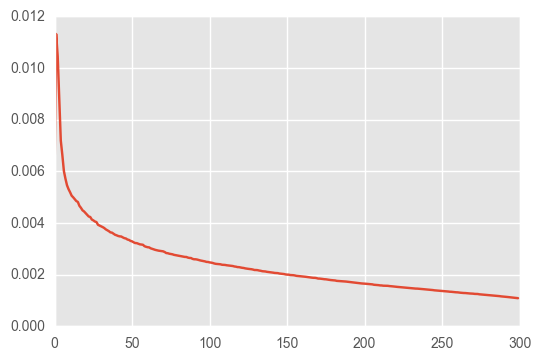

In [249]:
plt.plot(svd.explained_variance_ratio_)
plt.show()

# Create and Fit Model - Kmeans Clustering Classification #

In [250]:
from sklearn.cluster import KMeans
model_kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=100, n_init=30,verbose=0)
model_kmeans_ = KMeans(n_clusters=4, init='k-means++', max_iter=100, n_init=30,verbose=0)
model_kmeans_.fit(X_train_)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=4, n_init=30, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [230]:
from sklearn.feature_selection import SelectKBest, f_classif
columns = pd.Series(vectorizer_tfidf.get_feature_names())

selector = SelectKBest(f_classif, k=50)
selected_data = selector.fit_transform(X_train_,y_train)

kbest = columns[selector.get_support()]
print kbest

0          ability
1             able
2       absolutely
3      accelerator
4           accept
5           access
6        according
7         accurate
8           action
9          actions
10      activities
11            acts
12          actual
13        actually
14         adapter
16        addition
17      additional
18         address
20        advanced
22       aerospace
25           ahead
26        aircraft
27           alive
29           allow
30         allowed
31          allows
38          answer
39         answers
40         anybody
42      apparently
44           apple
45     application
49        approach
52            area
66         attempt
67       authority
83         batting
85         beliefs
98            book
115           came
123           case
125        catcher
137        changes
140        cheaper
191        control
205           cubs
221         decide
250          doesn
254          drive
278         errors
dtype: object


# Create Pipeline (Just plug in original raw data. Automates feature engineering, scaling, etc) # 

In [231]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
        ('Vectorizer',TfidfVectorizer(max_df=.5, max_features=1000,
                                 min_df=2, stop_words='english',
                                 use_idf=True, sublinear_tf=False, 
                                 analyzer = 'word',
                                 token_pattern = '[a-zA-Z]{4,50}',)),  # Turns each message into 2x2 Sparse Matrix where columns = messages, rows word 1 count, word 2 count, etc)
        ('Reduce_Features_SVD',TruncatedSVD(300)),  # Uses weight values to create/fit model
        ('Reduce_Features_normalizer',Normalizer(copy=False)),
        ('model_kmeans',KMeans(n_clusters=4, init='k-means++', max_iter=100, n_init=30,verbose=0)),
        ])

pipeline.fit(X_train,y_train)  # Pass in text data and it runs the pipeline on it

Pipeline(steps=[('Vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=0.5, max_features=1000, min_df=2,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf...4, n_init=30, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

# Meaure Performance of Kmeans #

# Print out your centroids. Look at the value for each centroid. Does each centroid represent a news group as expected #

In [232]:
centroids = svd.inverse_transform(model_kmeans_.cluster_centers_).argsort()[:, ::-1]

labels = vectorizer_tfidf.get_feature_names()

print("Categories:"), categories
print "\n"
for i in range(4):
    print "Cluster %d:" % i 
    temp = []
    for x in centroids[i, :10]:
        temp.append(labels[x])
    print temp

Categories: ['talk.religion.misc', 'rec.sport.baseball', 'comp.sys.mac.hardware', 'sci.space']


Cluster 0:
[u'space', u'nasa', u'shuttle', u'station', u'launch', u'like', u'earth', u'orbit', u'cost', u'program']
Cluster 1:
[u'year', u'team', u'game', u'baseball', u'games', u'think', u'runs', u'players', u'braves', u'season']
Cluster 2:
[u'apple', u'thanks', u'drive', u'problem', u'know', u'does', u'monitor', u'card', u'simms', u'video']
Cluster 3:
[u'just', u'like', u'think', u'people', u'know', u'does', u'time', u'good', u'jesus', u'make']


# Create and Visualize Predictions #

In [251]:
# Returns raw label/number value
predictions_values = pipeline.predict(X_test)
predictions_values_ = model_kmeans_.predict(X_train_)

# Measure Accuracy of Predictions (R^2, CrossValPredict, Classification Report, Confusion Matrix, etc)

In [257]:
from sklearn import metrics

print "Homogeneity: %0.3f" % metrics.homogeneity_score(y_test,predictions_values)
print "Completeness: %0.3f" % metrics.completeness_score(y_test,predictions_values)
print "V-measure: %0.3f" % metrics.v_measure_score(y_test,predictions_values)
print "Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(y_test,predictions_values)

Homogeneity: 0.435
Completeness: 0.500
V-measure: 0.466
Adjusted Rand-Index: 0.281


# NOTES 